In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


city_data = os.path.join("Resources/city_data.csv")
ride_data = os.path.join("Resources/ride_data.csv")

#read CSV

city_data_df = pd.read_csv(city_data)

ride_data_df = pd.read_csv(ride_data)

#merge data

combined_pyber_data_df=pd.merge(city_data_df, ride_data_df, on="city")


# Display the data table for preview

combined_pyber_data_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/18 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/18 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/18 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/18 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/18 2:26,23.00,7.200210e+11


## Bubble Plot of Ride Sharing Data

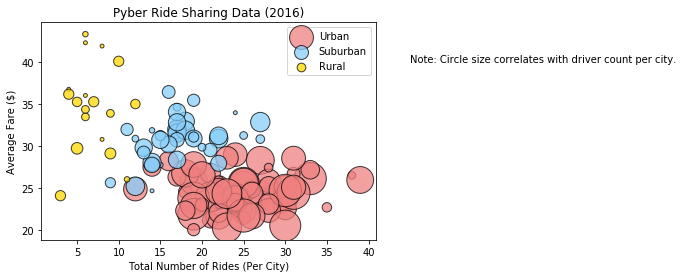

In [105]:

#variables for dataframe
ave_fare=combined_pyber_data_df.groupby("city")["fare"].mean()
rides_per_city=combined_pyber_data_df.groupby("city")["ride_id"].count()
drivers_per_city=combined_pyber_data.groupby("city")["driver_count"].mean()
city_types=city_data_df.set_index("city")["type"]
city_types.value_counts()

city_dataframe=pd.DataFrame({"Average Fare per City": ave_fare,"Number of Rides": rides_per_city,
                 "Number of Drivers": drivers_per_city,
                 "City Type": city_types })
city_dataframe.head()

#variables for scatter plot
urban = city_dataframe.loc[city_dataframe["City Type"]== "Urban"]
suburban = city_dataframe.loc[city_dataframe["City Type"]== "Suburban"]
rural = city_dataframe.loc[city_dataframe["City Type"]== "Rural"]

#x-axis
urban_x_axis=urban["Number of Rides"]
suburban_x_axis=suburban["Number of Rides"]
rural_x_axis=rural["Number of Rides"]

#y-axis
urban_y_axis=urban["Average Fare per City"]
suburban_y_axis=suburban["Average Fare per City"]
rural_y_axis=rural["Average Fare per City"]

#size of bubbles
urban_size=urban["Number of Drivers"]*15
suburban_size=suburban["Number of Drivers"]*15
rural_size=rural["Number of Drivers"]*15

#scatter plots
plt.scatter(urban_x_axis, urban_y_axis, color = "lightcoral", marker="o", edgecolors="black", s = urban_size, label = "Urban", alpha = 0.75, linewidth = 1)

plt.scatter(suburban_x_axis, suburban_y_axis, color = "lightskyblue",marker="o", edgecolors ="black", s = suburban_size, label = "Suburban", alpha = 0.75, linewidth = 1)

plt.scatter(rural_x_axis, rural_y_axis, color = "gold", marker="o", edgecolors = "black", s = rural_size, label = "Rural", alpha = 0.75, linewidth = 1)

#graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(45,40,"Note: Circle size correlates with driver count per city.")
plt.legend()
hth
plt.savefig("Images/ride_sharing.png")

plt.show()

## Total Fares by City Type

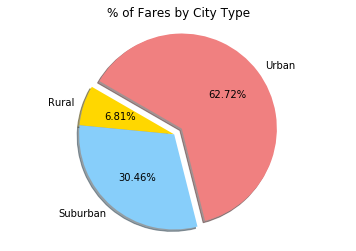

In [122]:

fares_by_type= combined_pyber_data_df.groupby("type")["fare"].sum()
fares_by_type


labels=["Rural", "Suburban", "Urban"]
colors=["gold", "lightskyblue", "lightcoral"]
explode=[0,0,.1]
plt.pie(fares_by_type, explode = explode, labels=labels, autopct = "%1.2f%%", colors = colors, shadow = True, startangle = 150)
plt.title("% of Fares by City Type")
plt.axis("equal")

plt.savefig("Images/fare_citytype.png")

plt.show()


## Total Rides by City Type

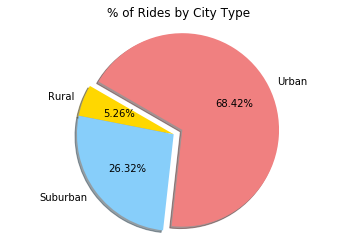

In [123]:

rides_by_type= combined_pyber_data_df.groupby("type")["ride_id"].count()
rides_by_type


labels=["Rural", "Suburban", "Urban"]
colors=["gold", "lightskyblue", "lightcoral"]
explode=[0,0,.1]
plt.pie(rides_by_type, explode = explode, labels=labels, autopct = "%1.2f%%", colors = colors, shadow = True, startangle = 150)
plt.title("% of Rides by City Type")
plt.axis("equal")

plt.savefig("Images/rides_citytype.png")

plt.show()

## Total Drivers by City Type

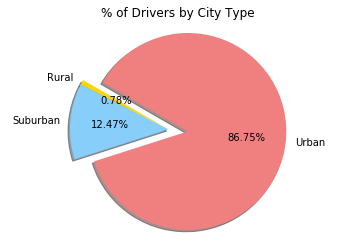

In [125]:

drivers_by_type= combined_pyber_data_df.groupby("type")["driver_count"].sum()
drivers_by_type


labels=["Rural", "Suburban", "Urban"]
colors=["gold", "lightskyblue", "lightcoral"]
explode=[0,0,.2]
plt.pie(drivers_by_type, explode = explode, labels=labels, autopct = "%1.2f%%", colors = colors, shadow = True, startangle = 150)
plt.title("% of Drivers by City Type")
plt.axis("equal")

plt.savefig("Images/drivers_citytype.png")

plt.show()

